In [190]:
import pandas as pd

In [191]:
df=pd.read_csv('startup_funding.csv')

In [192]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### Data Cleaning
- drop `remarks` column
- set index Sno.
- Rename the columns
- Convert the amount into Cr Rs
- Convert the Date col from string to Data_time
- drop the missing values

In [194]:
# drop remarks column

df.drop(columns=['Remarks'],inplace=True)

In [195]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [196]:
# set index Sno.
df.set_index('Sr No',inplace=True)

In [197]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [198]:
# Renaming the col.

df.rename(columns={
    'Date dd/mm/yyyy' : 'date',
    'Startup Name' : 'startup',
    'Industry Vertical' : 'vertical',
    'SubVertical' : 'subvertical',
    'City  Location' : 'city',
    'Investors Name' : 'investors',
    'InvestmentnType' : 'round',
    'Amount in USD' : 'amount'
},inplace=True)

In [199]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [200]:
# Convert the amount into Cr Rs

# as the amount col is a string so we need to convert it into Integer

df['amount']=df['amount'].fillna('0')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3020 non-null   object
 6   round        3040 non-null   object
 7   amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [202]:
df['amount'].astype('int')

ValueError: invalid literal for int() with base 10: '20,00,00,000'

#### invalid literal for int() with base 10: '20,00,00,000' : we have to remove the commas first

In [203]:
df['amount'].str.replace(',','')

Sr No
1       200000000
2         8048394
3        18358860
4         3000000
5         1800000
          ...    
3040      4500000
3041       825000
3042      1500000
3043            0
3044       140000
Name: amount, Length: 3044, dtype: object

In [204]:
df['amount']=df['amount'].str.replace(',','')

In [205]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [206]:
df['amount'].astype('int')

ValueError: invalid literal for int() with base 10: 'undisclosed'

#### invalid literal for int() with base 10: 'undisclosed' : there are values with filled with Undisclosed

In [207]:
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df['amount'].str.replace('unknown','0')
df['amount']=df['amount'].str.replace('Undisclosed','0')

In [208]:
df['amount'].astype('float')

ValueError: could not convert string to float: '14342000+'

In [209]:
df=df[df['amount'].str.isdigit()]

In [210]:
df['amount'].astype('float')

Sr No
1       200000000.0
2         8048394.0
3        18358860.0
4         3000000.0
5         1800000.0
           ...     
3040      4500000.0
3041       825000.0
3042      1500000.0
3043            0.0
3044       140000.0
Name: amount, Length: 3029, dtype: float64

In [211]:
df['amount']=df['amount'].astype('float')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3005 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [213]:
def INR(dollar):
    inr=dollar * 82.5
    return inr/10000000

In [214]:
df['amount']=df['amount'].apply(INR)

In [215]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [216]:
# Convert the Date col from string to Data_time

pd.to_datetime(df['date'])

ParserError: year 72018 is out of range: 05/072018

In [217]:
df['date']=df['date'].str.replace('05/072018','05/07/2018')

In [218]:
pd.to_datetime(df['date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 15-01-07 00:00:00

In [219]:
pd.to_datetime(df['date'],errors='coerce')

Sr No
1      2020-09-01
2      2020-01-13
3      2020-09-01
4      2020-02-01
5      2020-02-01
          ...    
3040   2015-01-29
3041   2015-01-29
3042   2015-01-30
3043   2015-01-30
3044   2015-01-31
Name: date, Length: 3029, dtype: datetime64[ns]

In [220]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [221]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3027 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [223]:
df['date'].dt.month

Sr No
1       9.0
2       1.0
3       9.0
4       2.0
5       2.0
       ... 
3040    1.0
3041    1.0
3042    1.0
3043    1.0
3044    1.0
Name: date, Length: 3029, dtype: float64

In [224]:
df=df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2822 non-null   datetime64[ns]
 1   startup      2822 non-null   object        
 2   vertical     2822 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2822 non-null   object        
 5   investors    2822 non-null   object        
 6   round        2822 non-null   object        
 7   amount       2822 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


### Exporting the DATA

In [226]:
df.to_csv('startup_cleaned.csv',index=False)

### Name of the Investors

In [227]:
df['investors'].unique().tolist()

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'Vijay Shekhar Sha

#### We are getting multiple Investors in same line

In [228]:
df['investors'].str.split(',')

Sr No
1                               [Tiger Global Management]
2                             [Susquehanna Growth Equity]
3                                 [Sequoia Capital India]
4                                        [Vinod Khatumal]
5                               [Sprout Venture Partners]
                              ...                        
2869                                      [SAIF Partners]
2870    [Sumit Jain,  Aprameya Radhakrishna,  Alok Goe...
2871                                         [Rainmatter]
2872                                        [The HR Fund]
2873          [Bessemer Venture Partners,  SAIF Partners]
Name: investors, Length: 2822, dtype: object

In [229]:
# merging the list

df['investors'].str.split(',').sum()

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels',
 ' Ravikanth Reddy',
 'SAIF Partners',
 ' Spring Canter Investment Ltd.',
 'Paytm',
 ' NPTK',
 ' Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia',
 ' CapitalG',
 ' Accel',
 'Sauce.vc',
 ' Rainforest Ventures',
 'Prime Venture Partners',
 ' LetsVenture',
 ' PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures',
 ' DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital',
 ' Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren',
 ' HealthQuad',
 ' Rebright Partners',
 ' Toppan Printing',
 'Matrix Partners',
 ' Stell

In [230]:
# now we want the unique values : set()

set(df['investors'].str.split(',').sum())

{'',
 ' Gaurav Munjal',
 ' Umang Kumar & Others',
 'APIS Partners',
 'Agnus Capital',
 'Social Alpha',
 'Undisclosed Angel investors & HNIs',
 'Sprout Venture Partners',
 'Emerging India',
 ' founder and chairman of career information portal Careers360',
 ' Tekton Ventures',
 ' Mumbai Angels',
 ' Gaurav Gupta',
 ' Quilvest',
 'Dunamis Ventures Pte Ltd',
 'Ivy League Alumni Angel Network',
 ' Elevar Equity and Accel Partners',
 'Sierra Ventures',
 'Indochine International',
 'The 1947',
 'Nilesh Shah',
 'HIS Co. Ltd',
 ' Silo Holdings and Al Nour',
 'Unilazer Fund',
 ' Amit Ranjan & others',
 'Gokul Jaykrishna',
 ' Lightbox',
 'Extreme Venture Partners\\\\xc2\\\\xa0 William Bissell',
 ' Rishi Srivastava',
 ' Sundar Chanrai',
 'Orios Venture Partners',
 ' Intel Capital',
 'Shiva Ashok & Other unnamed investors',
 ' Arun Garg',
 'Dileep Bhatt',
 ' Mahendra Doshi',
 ' Vellayan Subbiah',
 'Paytm (One97 communications)',
 'Ankur Capital',
 'Ajay Data & undisclosed HNIs',
 'Iron Pillar and II

In [231]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

### Recent Investent

In [232]:
df[df['investors'].str.contains(' Mumbai Angels Network')]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
394,2018-05-01,WOTU,E-commerce,Food and Beverages,Bengaluru,"Claris Capital, Mumbai Angels Network",Angel / Seed Funding,0.0


In [233]:
df[df['investors'].str.contains(' IDG Ventures')][['date','startup','vertical','city','round','amount']].head()

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.628844
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,181.500000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.375000
505,2017-11-21,Heckyl,Technology,Mumbai,Private Equity,22.275000
528,2017-05-10,Little Black Book,Consumer Internet,New Delhi,Private Equity,8.250000


### Biggest Investments

In [234]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')

In [235]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum()

startup
Aasaanjobs                41.250000
Active.ai                 24.750000
Bizongo                  181.500000
Cloudcherry Analytics      8.250000
CureFit                  206.250000
Curefit                  123.750000
FirstCry.com              82.500000
Heckyl                    22.275000
Lenskart                 495.000000
Little Black Book          8.250000
POPxo                     70.950000
PlaySimple                33.000000
RentMojo                  41.250000
Sigtuple                  47.850000
Tripoto                   29.628844
Xpressbees               103.125000
\\xc2\\xa0CloudCherry     49.500000
Name: amount, dtype: float64

In [236]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 495.000000
CureFit                  206.250000
Bizongo                  181.500000
Curefit                  123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
POPxo                     70.950000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
RentMojo                  41.250000
Aasaanjobs                41.250000
PlaySimple                33.000000
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
Little Black Book          8.250000
Cloudcherry Analytics      8.250000
Name: amount, dtype: float64

### Generally invest in....

#### Sectors

In [237]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [238]:
df[df['investors'].str.contains('Tiger Global Management')]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000
56,2019-08-22,INDwealth,FinTech,Wealth Management,Gurgaon,Tiger Global Management,Venture Round,123.750
69,2019-11-07,Moglix,E-Commerce,Industrial Tools and Equipments,Singapore,"Composite Capital Management, Sequoia Capital ...",Series D,495.000
86,2019-10-06,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,127.875
94,2019-02-05,Zenoti,Saas,Beauty and Wellness Industry,Hyderabad,Tiger Global Management,Series C,412.500
108,2019-11-04,CleverTap,SaaS,Mobile analytics and marketing,Mumbai,"Sequoia India, Tiger Global Management, Accel ...",Series B,214.500
341,2018-03-22,Chargebee,Technology,Subscription Billing & Recurring Payments Soft...,Chennai,"Insight Venture Partners, Accel Partners and T...",Private Equity,148.500
548,2017-10-13,Chaayos,eCommerce,Online Chai ordering platform,Gurgaon,Tiger Global Management,Private Equity,16.500
2037,2016-12-01,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,825.000


In [239]:
df[df['investors']=='Tiger Global Management'].groupby('vertical')

In [240]:
df[df['investors']=='Tiger Global Management'].groupby('vertical')['amount'].sum()

vertical
Automated Storage & Warehousing Solution     247.500
E-Tech                                      1650.000
FinTech                                      251.625
Offline Tea Chain                              8.250
Saas                                         412.500
eCommerce                                     16.500
Name: amount, dtype: float64

<AxesSubplot:ylabel='amount'>

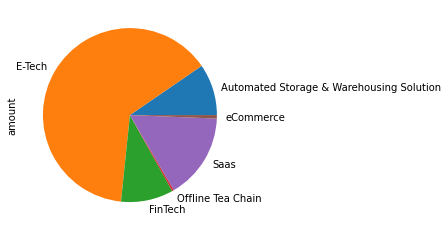

In [241]:
df[df['investors']=='Tiger Global Management'].groupby('vertical')['amount'].sum().plot(kind='pie')

#### stage

In [242]:
df[df['investors']=='Tiger Global Management'].groupby('round')['amount'].sum()

round
Private Equity           272.250
Private Equity Round    1650.000
Series A                 127.875
Series C                 412.500
Venture Round            123.750
Name: amount, dtype: float64

In [243]:
df[df['investors']=='Tiger Global Management'].groupby('city')['amount'].sum()

city
Bengaluru    1650.000
Gurgaon       387.750
Haryana       127.875
Hyderabad     412.500
New Delhi       8.250
Name: amount, dtype: float64

### Year-on-Year Investment Graph

In [244]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [245]:
# extracting the year

df['Year']=df['date'].dt.year

In [246]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,Year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020


In [247]:
df[df['investors'].str.contains('Tiger Global Management')]

,date,startup,vertical,subvertical,city,investors,round,amount,Year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000,2020
56,2019-08-22,INDwealth,FinTech,Wealth Management,Gurgaon,Tiger Global Management,Venture Round,123.750,2019
69,2019-11-07,Moglix,E-Commerce,Industrial Tools and Equipments,Singapore,"Composite Capital Management, Sequoia Capital ...",Series D,495.000,2019
86,2019-10-06,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,127.875,2019
94,2019-02-05,Zenoti,Saas,Beauty and Wellness Industry,Hyderabad,Tiger Global Management,Series C,412.500,2019
108,2019-11-04,CleverTap,SaaS,Mobile analytics and marketing,Mumbai,"Sequoia India, Tiger Global Management, Accel ...",Series B,214.500,2019
341,2018-03-22,Chargebee,Technology,Subscription Billing & Recurring Payments Soft...,Chennai,"Insight Venture Partners, Accel Partners and T...",Private Equity,148.500,2018
548,2017-10-13,Chaayos,eCommerce,Online Chai ordering platform,Gurgaon,Tiger Global Management,Private Equity,16.500,2017
2037,2016-12-01,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,825.000,2016


In [248]:
df[df['investors'].str.contains('Tiger Global Management')].groupby('Year')

In [249]:
df[df['investors'].str.contains('Tiger Global Management')].groupby('Year')['amount'].sum()

Year
2015    2952.675
2016     825.000
2017      16.500
2018     148.500
2019    1373.625
2020    1650.000
Name: amount, dtype: float64

<AxesSubplot:xlabel='Year'>

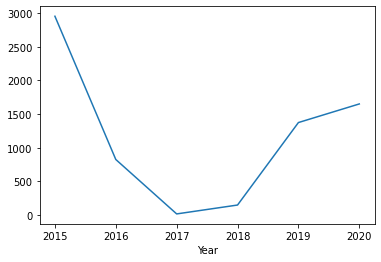

In [250]:
df[df['investors'].str.contains('Tiger Global Management')].groupby('Year')['amount'].sum().plot()

### Similar Investors

## General Investors

### Total Money on Startups

In [251]:
df['amount'].sum()

296491.79616375

### Maximum Funding

In [252]:
df.groupby('startup')['amount'].max()

startup
"BYJU\\'S"           1237.500
121Policy               0.000
19th mile               1.485
1Crowd                  0.000
1mg                   123.750
                       ...   
underDOGS               0.000
vImmune                 0.000
vPhrase Analytics       0.000
wayForward              8.250
zippserv                3.630
Name: amount, Length: 2299, dtype: float64

In [253]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).iloc[[0]][0]

32175.0

### Avg Funding

In [254]:
df.groupby('startup')['amount'].sum()

startup
"BYJU\\'S"           1237.500
121Policy               0.000
19th mile               1.485
1Crowd                  0.000
1mg                   330.000
                       ...   
underDOGS               0.000
vImmune                 0.000
vPhrase Analytics       0.000
wayForward              8.250
zippserv                3.630
Name: amount, Length: 2299, dtype: float64

In [255]:
df.groupby('startup')['amount'].sum().mean()

128.9655485705743

### Total Funded Startups

In [258]:
df['startup'].nunique()

2299

### Month on Month Chart

In [259]:
df

,date,startup,vertical,subvertical,city,investors,round,amount,Year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020
...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015


In [260]:
df['month']=df['date'].dt.month

In [261]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,Year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2


In [262]:
df.groupby(['Year','month'])

In [263]:
df.groupby(['Year','month'])['startup'].count()

Year  month
2015  1        35
      2        14
      3        36
      4        65
      5        53
               ..
2019  12       10
2020  1         2
      2         2
      9         2
      10        1
Name: startup, Length: 63, dtype: int64

In [264]:
df.groupby(['Year','month'])['startup'].count().reset_index()

,Year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [266]:
temp_df=df.groupby(['Year','month'])['amount'].sum().reset_index()

In [268]:
temp_df['x-axis']=temp_df['month'].astype('str') + '-' + temp_df['Year'].astype('str')

In [272]:
temp_df[['x-axis','amount']]

,x-axis,amount
0,1-2015,5274.637500
1,2-2015,1567.178250
2,3-2015,1910.658750
3,4-2015,4511.058750
4,5-2015,1401.427500
...,...,...
58,12-2019,3667.125000
59,1-2020,140.649250
60,2-2020,39.600000
61,9-2020,1801.460595


In [273]:
temp_df1=df.groupby(['Year','month'])['startup'].count().reset_index()

In [274]:
temp_df1['x-axis']=temp_df['month'].astype('str') + '-' + temp_df['Year'].astype('str')

In [275]:
temp_df1[['x-axis','startup']]

,x-axis,startup
0,1-2015,35
1,2-2015,14
2,3-2015,36
3,4-2015,65
4,5-2015,53
...,...,...
58,12-2019,10
59,1-2020,2
60,2-2020,2
61,9-2020,2
